# Machine Learning 1 -- Final Project - Predict Survival On the Titanic
#### By Zhaoyang Chen, Zhen Zhang

## Introduction
>* This is our final project. We worked with the training set within Titanic data that is from Kaggle after spending time finding. The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, causing 1502 death out of 2224 passengers and crew.   
* This dataset contains the data of 891 Titanic passengers. Specifically, there are 577 females, and 314 males in this dataset. 
* In our project, we will apply machine learning techniques to build the optimal model, find the most valuable predicators, and predict the probability of survival on the Titanic.

## 1. Data Overview

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import data
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Dictionary
>* Survival: Survival(0=Not survived, 1=Survived)
>* Pclass: Ticket class（1=1st, 2=2nd, 3=3rd)
>* Sex: Sex
>* Age: Age in year
>* Sibsp: Number of siblings/ sponses aboard the Titanic
>* Parch： Numbar of parents/children aboard the Titanic
>* Ticket: Ticket number
>* Fare: Passenger fare
>* Cabin: Cabin number
>* Embarked: Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

In [157]:
#get dimensionally of our dataset
data.shape
# Our dataset have 12 indicators

(891, 12)

In [158]:
#summary statistics anaalysis for numerical data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


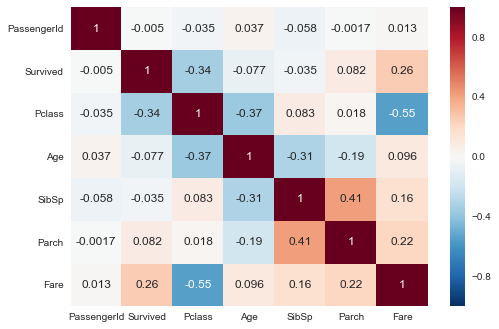

In [159]:
# calculate the correlation of each variable. 
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, annot=True)
plt.show()
#Here, we see the 'age', 'fare', and 'parch' are most related to 'Survived'

In [160]:
# find the number of missing values for each variable
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. Data Preprocessing

### 1). Drop the data 

In [161]:
# We drop the PassengerID, Name, and Ticket since they are not related to our prediction
data.drop(labels=['PassengerId', 'Name', 'Ticket'], axis=1, inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [162]:
# Since there are too many missing value(687/891) for 'Cabin' column, it is not helpful to our research
# Theredfore, we drop this indicator
data.drop('Cabin', axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 2). Imputing missing value 

#### Embarked

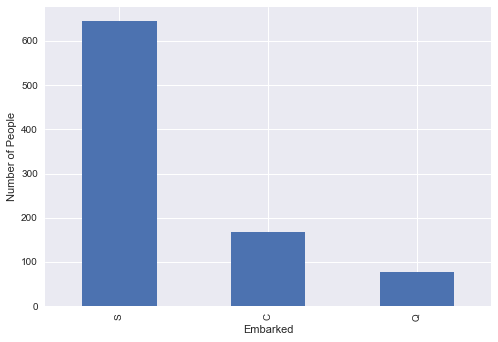

In [163]:
# There only 2 missing values for the indicator 'Embarked'
data['Embarked'].value_counts().plot(kind='bar')
plt.xlabel("Embarked")
plt.ylabel("Number of People")
plt.show()

In [164]:
# We use the mode to impute missing value for 'Embarked' since it is a factor variable
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [165]:
data.Embarked.isnull().sum() # check whether "Embarked" has missing values after imputation

0

#### Age

In [166]:
# There are 177 missing values in "Age"
data['Age'].isnull().sum()

177

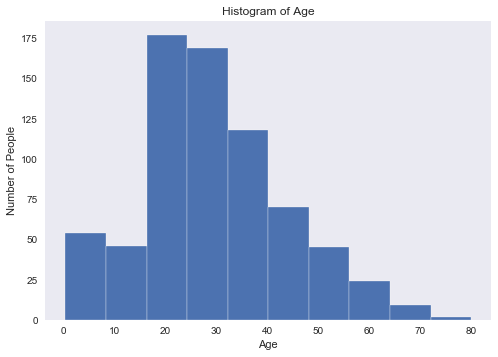

In [167]:
# deal with missing values for 'Age'
data['Age'].hist(edgecolor='white', grid=False)
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Histogram of Age")
plt.show()

In [168]:
# Since the distribution of 'Age' is normal, we use the median to impute the missing values
# To make the imputation more accurate, we group them by sex, and then calculate the median separatly
age_median = data.groupby("Sex").Age.median()
data.set_index('Sex', inplace=True)
data.Age.fillna(age_median, inplace=True)
data.reset_index(inplace=True)
data.Age.isnull().sum()

0

In [169]:
#statistical analysis for 'Age' after imputing
data.Age.describe()

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### 3). Handling Categorical Data

In [170]:
from sklearn.preprocessing import OneHotEncoder
# performing one-hot encoding on categorical varibles in order to convert them into a form that 
# could provide the meachine learning algorithms to do a wonderful predication
data_dummy=pd.get_dummies(data[['Sex', 'Embarked']])
data.head()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,male,0,3,22.0,1,0,7.2500,S
1,female,1,1,38.0,1,0,71.2833,C
2,female,1,3,26.0,0,0,7.9250,S
3,female,1,1,35.0,1,0,53.1000,S
4,male,0,3,35.0,0,0,8.0500,S


In [171]:
# togethered the other varible with the varible that we encoding
data_others=pd.DataFrame(data, columns=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
index=data.index)
data=data_others.join(data_dummy)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### 4). Partitioning a dataset into seperate training and testing set

In [172]:
#Here, we chose 70% of our dataset as training set, and 30% of our dataset as testing set.
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.3, 
                                                     random_state=0)

In [173]:
print('Compare the size of Dataset')
print('============================')
print('The orginal dataset:{}'.format(data.shape))
print('The trining dataset for indenpendent varlible:{}'.format(X_train.shape))
print('The trining dataset for denpendent varlible:{}'.format(y_train.shape))
print('The testing dataset for indenpendent varlible:{}'.format(X_test.shape))
print('The testing dataset for indenpendent varlible:{}'.format(y_test.shape))

Compare the size of Dataset
The orginal dataset:(891, 11)
The trining dataset for indenpendent varlible:(623, 10)
The trining dataset for denpendent varlible:(623,)
The testing dataset for indenpendent varlible:(268, 10)
The testing dataset for indenpendent varlible:(268,)


### 5).Bringing features onto the same scale


In [174]:
# In order to ensure fast convergence of our model, we need to convert the data into the same scale
# since we found there are some significant differences for some varibles, such as Age, Fare.
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

## 3. Models

In [175]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc

### 1). Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
# Make the logistic regression model based on training set
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
#test the model
y_pred_lr = lr.predict(X_test)#predict value
# Calculate the precision score
precision_lr=round(precision_score(y_test,y_pred_lr)*100,2)
# Calculate recall score
recall_lr=round(recall_score(y_test,y_pred_lr)*100,2)
#Calculate the F1 score
f1_lr=round(f1_score(y_test,y_pred_lr)*100,2)
#Calculate the accurancy of logictic regression
acc_lr=round(lr.score(X_train,y_train)*100,2)
# Calculate the AUC
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
print('The precision of logistic regression classifier on test set is %2.2f.'% precision_lr)
# all people that labeled as survived, there are 72.73% probabilty that they acturally survived
print('The recall score of logistic regression classifier on test set is %2.2f.'% recall_lr)
# We labeled  72% as survived amnong all the people survived is good since it more than 0.5
print('The f1 score of logistic regression classifier on test set is %2.2f.'% f1_lr)
print('The accurancy of logistic regression classifier is %2.2f.'% acc_lr)
# There are 80.26% probability correctly predict
print('The AUC of logistic regression classifier on test set is %6.6f.'% roc_auc_lr)

The precision of logistic regression classifier on test set is 72.73.
The recall score of logistic regression classifier on test set is 72.00.
The f1 score of logistic regression classifier on test set is 72.36.
The accurancy of logistic regression classifier is 80.26.
The AUC of logistic regression classifier on test set is 0.779643.


### 2). KNN

In [179]:
# Make the KNN based on training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [180]:
#test the model
y_pred_knn = knn.predict(X_test)#predict value
# Calculate the precision score
precision_knn=round(precision_score(y_test,y_pred_knn)*100,2)
# Calculate recall score
recall_knn=round(recall_score(y_test,y_pred_knn)*100,2)
#Calculate the F1 score
f1_knn=round(f1_score(y_test,y_pred_knn)*100,2)
#Calculate the accurancy of KNN
acc_knn=round(knn.score(X_train,y_train)*100,2)
# Calculate the AUC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print('The precision of KNN classifier on test set is %2.2f.'% precision_knn)
print('The recall score of KNN classifier on test set is %2.2f.'% recall_knn)
print('The f1 score of KNN classifier on test set is %2.2f.'% f1_knn)
print('The accurancy of KNN classifier is %2.2f.'% acc_knn)
print('The AUC of KNN classifier on test set is %6.6f.'% roc_auc_knn)

The precision of KNN classifier on test set is 71.58.
The recall score of KNN classifier on test set is 68.00.
The f1 score of KNN classifier on test set is 69.74.
The accurancy of KNN classifier is 85.87.
The AUC of KNN classifier on test set is 0.759643.


### 3). Decision Tree

In [181]:
#Make the decision based on training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [182]:
#test the model
y_pred_dt = dt.predict(X_test)
# Calculate the precision score
precision_dt=round(precision_score(y_test,y_pred_dt)*100,2)
# Calculate recall score
recall_dt=round(recall_score(y_test,y_pred_dt)*100,2)
#Calculate the F1 score
f1_dt=round(f1_score(y_test,y_pred_dt)*100,2)
#Calculate the accurancy of decision tree
acc_dt=round(dt.score(X_train,y_train)*100,2)
# Calculate the AUC
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print('The precision of decision tree classifier on test set is %2.2f.'% precision_dt)
print('The recall score of decision tree classifier on test set is %2.2f.'% recall_dt)
print('The f1 score of decision tree classifier on test set is %2.2f.'% f1_dt)
print('The accurancy of decision tree classifier is %2.2f.'% acc_dt)
print('The AUC of decision tree classifier on test set is %6.6f.'% roc_auc_dt)

The precision of decision tree classifier on test set is 71.11.
The recall score of decision tree classifier on test set is 64.00.
The f1 score of decision tree classifier on test set is 67.37.
The accurancy of decision tree classifier is 97.43.
The AUC of decision tree classifier on test set is 0.742619.


### 4). Random Forest

In [183]:
# Make the random forest on training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [184]:
#test the model
y_pred_rf = rf.predict(X_test)
# Calculate the precision score
precision_rf=round(precision_score(y_test,y_pred_rf)*100,2)
# Calculate recall score
recall_rf=round(recall_score(y_test,y_pred_rf)*100,2)
#Calculate the F1 score
f1_rf=round(f1_score(y_test,y_pred_rf)*100,2)
#Calculate the accurancy of random forest
acc_rf=round(rf.score(X_train,y_train)*100,2)
# Calculate the AUC
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print('The precision of random forest classifier on test set is %2.2f.'% precision_rf)
print('The recall score of random forest classifier on test set is %2.2f.'% recall_rf)
print('The f1 score of random forest classifier on test set is %2.2f.'% f1_rf)
print('The accurancy of random forest classifier is %2.2f.'% acc_rf)
print('The AUC of random forest classifier on test set is %6.6f.'% roc_auc_rf)

The precision of random forest classifier on test set is 76.09.
The recall score of random forest classifier on test set is 70.00.
The f1 score of random forest classifier on test set is 72.92.
The accurancy of random forest classifier is 97.43.
The AUC of random forest classifier on test set is 0.784524.


## 4. Model Comparison

In [185]:
index=['Logistic Regression','KNN','Decision Tree','Random Forest']
allmodels = pd.DataFrame({
    'Precision': [precision_lr, precision_knn, 
              precision_dt, precision_rf],
    'Recall_Score':[recall_lr, recall_knn,
                    recall_dt, recall_rf],
    'F1_Score':[f1_lr, f1_knn, f1_dt, f1_rf],
    'Accurancy':[acc_lr, acc_knn, acc_dt, acc_rf],
    'AUC':[roc_auc_lr, roc_auc_knn, roc_auc_dt,
          roc_auc_rf]}, index=index)

allmodels
# Therefore, after examing the comparison result, we chose the Random forest as our model

,AUC,Accurancy,F1_Score,Precision,Recall_Score
Logistic Regression,0.779643,80.26,72.36,72.73,72.0
KNN,0.759643,85.87,69.74,71.58,68.0
Decision Tree,0.742619,97.43,67.37,71.11,64.0
Random Forest,0.784524,97.43,72.92,76.09,70.0


## 5. Model Optimization

### 1). Feature Importance Measure

In [186]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


 1) Age                            0.257592
 2) Fare                           0.242387
 3) Sex_male                       0.147657
 4) Sex_female                     0.140224
 5) Pclass                         0.079867
 6) SibSp                          0.058357
 7) Parch                          0.033602
 8) Embarked_S                     0.018187
 9) Embarked_C                     0.013696
10) Embarked_Q                     0.008431


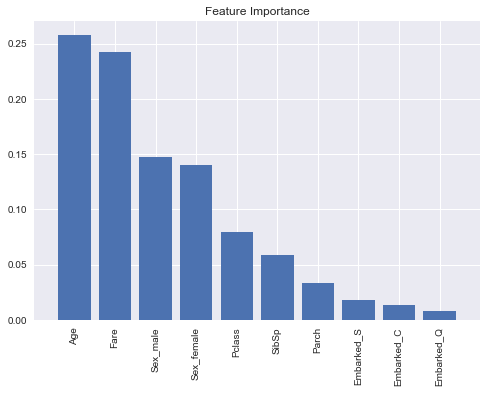

In [187]:
# See the importance of each variable based our forest random model
feat_labels = data.columns[1:]
importances=rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

plt.show()


In [189]:
# select the important features using feature_selection
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf, threshold=0.1, prefit=True)
X_train_selected = sfm.transform(X_train)
print('Number of features that meet this criterion:', 
      X_train_selected.shape[1])

Number of features that meet this criterion: 4


In [190]:
for f in range(X_train_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Age                            0.257592
 2) Fare                           0.242387
 3) Sex_male                       0.147657
 4) Sex_female                     0.140224


In [191]:
# We changed the indicators of our dataset in order to optimize our model
#here, we want to make sure the shape of our training dataset
X_train_selected.shape

(623, 4)

In [192]:
#here, we want to make sure the shape of our testing dataset
X_test_selected = sfm.transform(X_test)
X_test_selected.shape

(268, 4)

### 2). Work with Paramaters


#### n_jobs

In [193]:
%%timeit
model=RandomForestClassifier(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X_train_selected,y_train) # We chose n_jobs=1 since it is faster

1 loop, best of 3: 1.4 s per loop


In [194]:
%%timeit
model=RandomForestClassifier(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X_train_selected,y_train)

1 loop, best of 3: 1.56 s per loop


#### n_estimators

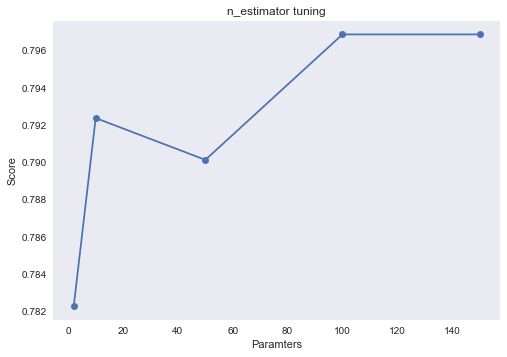

In [197]:
from sklearn.model_selection import cross_val_score
def para_tune(para, X_train_selected, y_train): 
    model = RandomForestClassifier(n_estimators=para, n_jobs=1)
    score = np.mean(cross_val_score(model, X_train_selected, y_train, scoring='accuracy'))
    return score


def accurate_curve(para_range, X_train_selected, y_train, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X_train_selected, y_train))
    plt.figure()
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    return plt


g = accurate_curve([2, 10, 50, 100, 150], X, y, 'n_estimator tuning')
plt.show()

#### max_depth

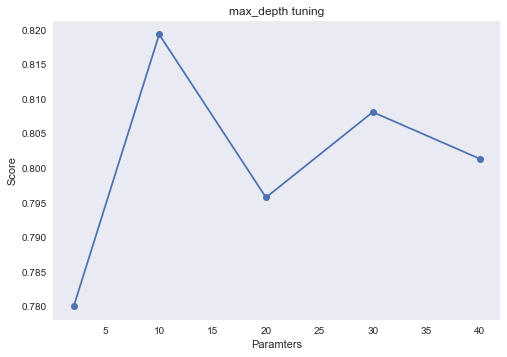

In [198]:
def para_tune(para, X_train_selected, y_train):
    model = RandomForestClassifier(n_estimators=100,n_jobs=1, max_depth=para)
    score = np.mean(cross_val_score(model, X_train_selected, y_train, scoring='accuracy'))
    return score


def accurate_curve(para_range, X_train_selected, y_train, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X_train_selected, y_train))
    plt.figure()
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    return plt


g = accurate_curve([2, 10, 20, 30, 40], X, y, 'max_depth tuning')
plt.show()

#### min_samples_leaf

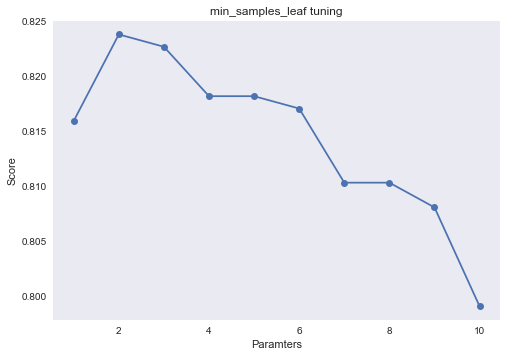

In [200]:
def para_tune(para, X_train_selected, y_train):
    model = RandomForestClassifier(n_estimators=100,n_jobs=1, max_depth=10, min_samples_leaf=para)
    score = np.mean(cross_val_score(model, X_train_selected, y_train, scoring='accuracy'))
    return score


def accurate_curve(para_range, X_train_selected, y_train, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X_train_selected, y_train))
    plt.figure()
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    return plt


g = accurate_curve([1, 2, 3, 4,5,6,7,8,9,10], X, y, 'min_samples_leaf tuning')
plt.show()

## Model Comparison of the 4 features model with the 10 features model

#### The optimized model with the most important 4 features

In [204]:
# create the optimal model with the new parameters
rf_new=RandomForestClassifier(n_estimators=100,
                       max_depth=10, min_samples_leaf=2, n_jobs=1)

In [205]:
# test the optimal model with 4 features
rf_new.fit(X_train_selected, y_train) 
y_pred_rf_new_4features= rf_new.predict(X_test_selected)

In [206]:
# compute the AUC vlue
fpr_rf_new_4features, tpr_rf_new_4features, thresholds_4features = roc_curve(y_test, y_pred_rf_new_4features)
roc_auc_rf_4features = auc(fpr_rf_new_4features, tpr_rf_new_4features) # 
print('The AUC of random forest classifier on test set is %6.6f.'% roc_auc_rf_4features)

The AUC of random forest classifier on test set is 0.776667.


In [207]:
index_op=['Optimized Model with 4 Features','Model before Optimized']
compmodels = pd.DataFrame({
    'AUC':[roc_auc_rf_4features, roc_auc_rf]}, index=index_op)
compmodels

,AUC
Optimized Model with 4 Features,0.776667
Model before Optimized,0.784524


#### The optimized model with all the 10 features

In [208]:
# test the optimal model with 10 features
rf_new.fit(X_train, y_train) 
y_pred_rf_new= rf_new.predict(X_test)

In [209]:
# compute the AUC value
fpr_rf_new, tpr_rf_new, thresholds = roc_curve(y_test, y_pred_rf_new)
roc_auc_rf_new = auc(fpr_rf_new, tpr_rf_new) # 
print('The AUC of random forest classifier on test set is %6.6f.'% roc_auc_rf_new)

The AUC of random forest classifier on test set is 0.821429.


#### Model Comparison of the two new models

In [210]:
index_new=['Optimized Model with 4 Features','Optimized Model with 10 Features']
newmodels = pd.DataFrame({
    'AUC':[roc_auc_rf_4features, roc_auc_rf_new]}, index=index_new)
newmodels
#Through the comparison, we choose the Random forest as our model

,AUC
Optimized Model with 4 Features,0.776667
Optimized Model with 10 Features,0.821429


## Conclusion
>Due to the fact that there are too many missing values in the variable “Age”, it is unlikely to make a perfect imputation, which might affect the prediction. Overall, the last model we made has came up with a very high AUC value and accuracy, which we believe it will give a relatively accurate prediction on the survival probability on the Titanic. 